In [5]:
from bai_tap_1 import prepare_data
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355,
    -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1 * w1 + x2 * w2 + x3 * w3 + b
    return result

def compute_loss_mse(y_hat, y):
    loss = (y_hat-y)**2
    return loss
def compute_loss_mae(y, y_hat):
    result = abs(y_hat-y)
    return result 

def compute_gradient_wi(xi,y,y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi 
def compute_gradient_b(y,y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db 

def update_weight_wi(wi, dl_dwi, lr):
    wi -= lr*dl_dwi 
    return wi 
def update_weight_b(b, dl_db, lr):
    b -= lr*dl_db
    return b 

In [26]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50,lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total  = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y  = y_data[i]

            # print(y)
            # compute output 
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss 
            loss = compute_loss_mse(y, y_hat)

            # accumulate loss to total loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db  = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters
        w1 -= lr * (dw1_total/N) 
        w2 -= lr * (dw2_total/N) 
        w3 -= lr * (dw3_total/N) 
        b -= lr * (db_total/N)

        # logging
        losses.append(loss_total/N) 
    return (w1,w2,w3,b, losses)

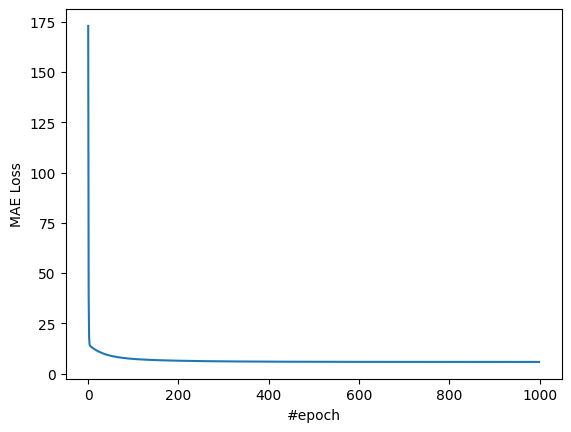

In [27]:
import matplotlib.pyplot as plt
X,y = prepare_data('/Users/macbook/Documents/AIO2024/AIO2024-Exercise/Module4/Week1/advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [28]:
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403
